# Contenido <a id='back'></a>


* [Introducción](#intro)
* [Etapa 1. Exploración de los datos](#exploracion_datos)
    * [Inicialización](#inicializacion) 
    * [Cargar los datos](#cargar)
    * [Explorar datos iniciales](#explorar)
    * [Conclusiones y siguientes pasos](#pasos)
* [Etapa 2. Preparar los datos](#preparar)
    * [Reenombrar las columnas](#reenombrar)
    * [Tratar los valores ausentes](#ausentes)
    * [Corregir tipos de datos](#corregir)
    * [Enriquecer datos](#enriquecer)
* [Etapa 3. Analizar los datos](#analizar)
    * [Ventas PS2](#ps2)
    * [Ventas X360](#x360)
    * [Ventas PS3](#ps3)
    * [Ventas Wii](#wii)
    * [Conclusiones ventas](#conclu_ventas)
* [Etapa 4. Nuevo conjunto de datos](#nuevo)
    * [Ventas PS4](#ps4)
    * [Ventas PS3](#ps3_n)
    * [Ventas X360](#x360_n)
    * [Ventas 3DS](#3ds)
    * [Ventas XOne](#xone)
    * [Ventas WiiU](#wiiu)
    * [Conclusiones](#conclu_nuevo)
* [Etapa 5. Estudio de ventas globales](#estudiar_ventas)
* [Etapa 6. Correlación entre las reseñas y las ventas](#correlacion)
    * [Reseñas de usuarios y ventas](#usuarios)
    * [Reseñas de críticos y ventas](#criticos)
    * [Conclusiones](#conclu_reseñas)
* [Etapa 7. Estudio de ventas por juegos](#estudiar)
    * [Juegos PS4](#juegos_ps4)
    * [Juegos XOne](#juegos_xone)
    * [Conclusiones](#conclu_juegos)
* [Etapa 8. Distribución general de los juegos por género](#distribucion)
    * [Acción](#accion)
    * [Shooter](#shooter)
    * [Role-Playing](#role)
    * [Sports](#sports)
    * [Conclusiones](#conclu_generos)
* [Etapa 9. Perfil de usuario por región](#perfil)
    * [Región NA](#na)
    * [Región EU](#eu)
    * [Región JP](#jp)
    * [Other Regiones](#other)
    * [Conclusiones](#conclu_regiones)    
* [Etapa 10. Hipótesis estadísticas](#hipotesis)
    * [Hipótesis 1: ¿Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son iguales?](#hipotesis_1)
    * [Hipótesis 2: ¿Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes no son diferentes?](#hipotesis_2)
* [Conclusión general](#general)
           

# ¿Es exitoso el juego?<a id='intro'></a>
Trabajas para la tienda online Ice que vende videojuegos por todo el mundo. Tienes que identificar patrones que determinen si un videojuego tiene éxito o no. Esto te permitirá detectar proyectos prometedores y planificar campañas publicitarias.


Este proyecto tiene como propósito identificar patrones que determinen si un videojuego tiene éxito o no, la información sobre reseñas de usuarios y expertos, los géneros, las plataformas y los datos históricos sobre las ventas están disponibles en fuentas abiertas. Se va a tratar los valores ausentes, corregir los tipo de datos, analizar los datos limpios, crear un perfil de usuario para cada región, probar algunas hipótesis para luego determinar las conclusiones del estudio.

## Exploración de los datos <a id='exploracion_datos'></a>

### Inicialización <a id='inicializacion'></a>

In [1]:
# Importación de librerías

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as st

### Cargar datos <a id='cargar'></a>

In [2]:
# Carga del archivo de datos DataFrame

games= pd.read_csv('/datasets/games.csv')

### Explorar datos iniciales <a id='exploracion_datos'></a>

In [3]:
# Información general/resumen sobre el DataFrame 
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
# Muestra de los datos
games.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


El dataset games contiene los siguientes campos:
- `Name` — nombre del juego
- `Platform` — plataforma
- `Year_of_Release `— año de lanzamiento
- `Genre ` — género del juego
- `NA_sales ` — ventas en Norteamérica en millones de dólares estadounidenses
- `EU_sales ` — ventas en Europa en millones de dólares estadounidenses
- `JP_sales ` — ventas en Japón en millones de dólares estadounidenses
- `Other_sales ` — ventas en otros países en millones de dólares estadounidenses
- `Critic_Score ` — puntuación crítica (máximo de 100) 
- `User_Score ` — puntuación de usuario (máximo de 10) 
- `Rating` — Clasificación (ESRB Junta de clasificación de software de entretenimiento)


Tenemos un conjunto de datos conformado por 11 columnas, en algunas se necesita ajustar su tipo de dato, las columnas Name, Year_of_Release, Genre, Critic_Score,User_Score y Rating tienen valores asusentes, tiene 16715 filas y los nombres de las columnas tienen letras mayúsculas.

 ### Conclusiones y siguientes pasos <a id='pasos'></a>


En vista que los datos presentan algunos problemas que deben ser tratados, lo primero que se hará es modificar los nombres de las columnas para que solo contengan letras minúsculas, se ajustarán los tipos de datos de las columnas Year_of_Release al tipo Datetime y User_Score a float y se procede a estudiar los valores ausentes para determinar que hacer con ellos.

## Preparar los datos <a id='preparar'></a>

### Reenombrar las columnas <a id='reenombrar'></a>

In [5]:
games.columns=['name','platform','year_of_release','genre','na_sales','eu_sales','jp_sales','other_sales',
               'critic_score','user_score','rating']
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Tratar los valores ausentes <a id='ausentes'></a>

In [6]:
# estudiar valores ausentes
games.isnull().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [7]:
#Reemplazar valores ausentes en 'Name'
games.fillna({'name': 'No disponible'}, inplace=True)

#Reemplazar valores ausentes en 'genre'
games.fillna({'genre': 'No disponible'}, inplace=True)

#Reemplazar valores ausentes en 'rating'
games.fillna({'rating': 'TBD'}, inplace=True)

Al no poder calcular medias y medianas de la variable 'name' y 'genre' se decide reemplazarlos por 'No disponible', de esta manera no se afectan los valores del resto de los datos, en la columna rating se colocará TBD que es la abreviatura de 'a determinar' ya que aún no contamos con la clasificación de estos videojuegos. 

In [8]:
#Reemplazar 'tbd' en la columna 'user_score' con 0
games['user_score']= games['user_score'].replace('tbd',0)
#Cambiar tipo de dato de 'user_score' para poder realizar calculos de medias y medianas. 
games['user_score'] = games['user_score'].astype('float')
                                                            

In [9]:
# Eliminar filas con valores ausentes en 'year_of_release'
games= games.dropna(subset = ["year_of_release"], axis=0)

En la columna 'year_of_release' se decide eliminar las filas que tienen valores ausentes ya que son pocos datos y no causarán ningun impacto en el analisis del conjunto total de datos.

En las columnas 'critic_score' y 'user_score' se decide dejarlos como están así afectamos lo menos posible el conjunto de datos. 

In [10]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16446 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16446 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   float64
 10  rating           16446 non-null  object 
dtypes: float64(7), object(4)
memory usage: 1.5+ MB


In [11]:
# actualizar valores ausentes
games.isnull().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8463
user_score         6607
rating                0
dtype: int64

In [12]:
# Comprobar la tabla con los valores ausentes reemplazados
games.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,TBD
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,TBD
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,TBD
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,TBD


### Corregir los tipos de datos <a id='corregir'></a>

In [13]:
# cambiar tipos de datos

games['year_of_release'] = pd.to_datetime(games['year_of_release'], format='%Y')
games['year_of_release']= pd.DatetimeIndex(games['year_of_release']).year

In [14]:
# actualizar información general
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16446 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int64  
 3   genre            16446 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   float64
 10  rating           16446 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [15]:
# comprobar datos limpios
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,TBD
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,TBD


### Enriquecer datos <a id='enriquecer'></a>

In [16]:
# Agregar las ventas totales (la suma de las ventas en todas las regiones)

games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']
games.head()


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,TBD,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,TBD,31.38


## Analizar los datos <a id='analizar'></a>

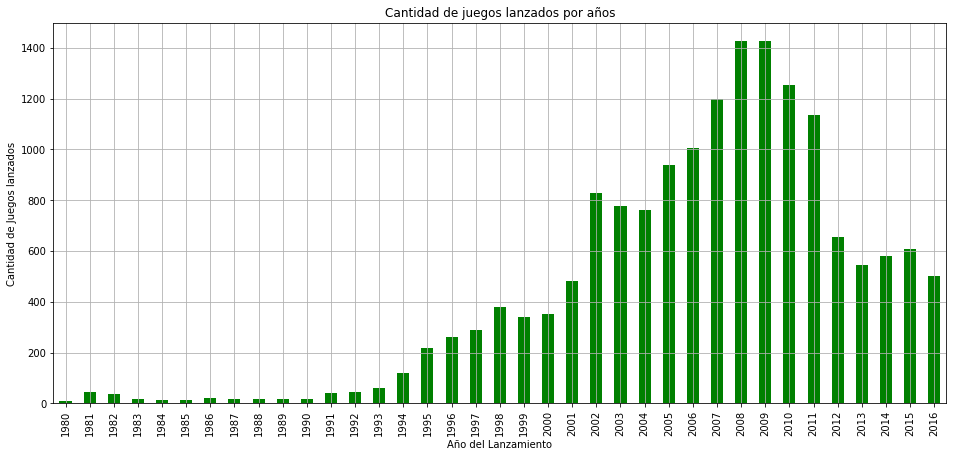

In [17]:
# Cantidad de juegos lanzados en diferentes años
total_year_release= games.groupby('year_of_release')['year_of_release'].count()
total_year_release.plot(kind='bar',title= 'Cantidad de juegos lanzados por años',color='green',
                               grid=True,figsize=(16,7))
plt.ylabel('Cantidad de Juegos lanzados')
plt.xlabel('Año del Lanzamiento')
plt.show()

En el período entre 1980 y 2016 se puede observar que es a partir de 1993 cuando empiezan a aumentar significativamente el lanzamiento de videojuegos, pero no es hasta el 2005 donde se puede ver un aumento constante y significativo y es en 2008 y 2009 donde se encuentra  el mayor pico en los 1400, a partir de ahí los lanzamientos comienzan a bajar considerablente y se encuentran entre los 500 y 600 lanzamientos.

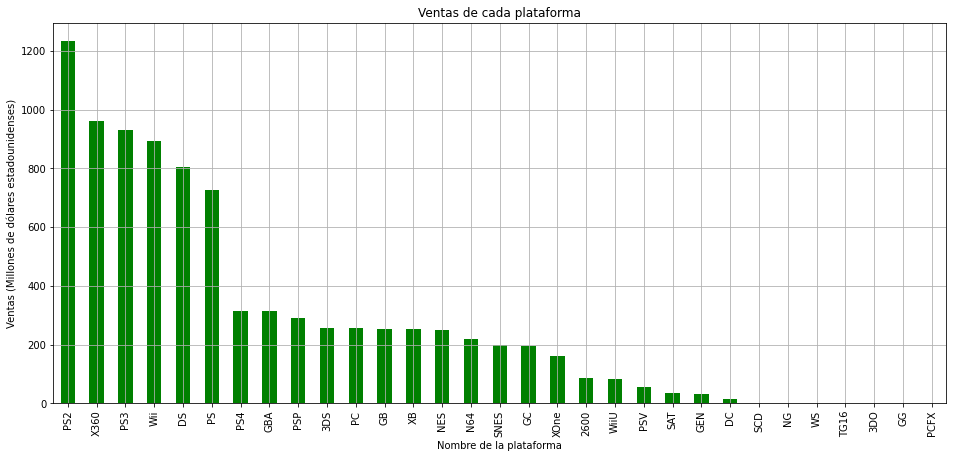

In [18]:
# Calcular las ventas cada plataforma. 

total_sales_platform= games.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
total_sales_platform.plot(kind='bar',title= 'Ventas de cada plataforma',color='green',
                               grid=True,figsize=(16,7))
plt.ylabel('Ventas (Millones de dólares estadounidenses)')
plt.xlabel('Nombre de la plataforma')
plt.show()

Se puede observar que las plataformas con más ventas son: PS2, X360, PS3, Wii y las que tuvieron unas ventas con valores medios son:DS, PS, PS4, GBA, PSP, 3DS, PC, GB, XB, NES, N64, SNES, GC, XOne, 2600, WiiU y por el contrario las de menor ventas son:PSV, SAT, GEN, DC, SCD, NG, WS, TG16, 3DO, GG y PCFX. 

Por lo que se seleccionan las plataformas de  PS2, X360, PS3 y Wii para el análisis, ya que son las que tienen una mayor cantidad de ventas. 


### Ventas PS2 <a id='ps2'></a>

In [19]:
#Subconjunto con las plataformas con mayores ventas
sub_ventas_mayores= games.query('platform == "PS2" | platform == "X360" | platform == "PS3" | platform == "Wii" | platform == "DS" | platform == "PS"')

#Ventas PS2

sub_ventas= sub_ventas_mayores[['platform', 'year_of_release','total_sales']]
sub_ventas_ps2= sub_ventas.query('platform == "PS2"')
sub_ventas_ps2['year_of_release'].describe()


count    2127.000000
mean     2004.583921
std         2.567689
min      2000.000000
25%      2002.000000
50%      2005.000000
75%      2007.000000
max      2011.000000
Name: year_of_release, dtype: float64

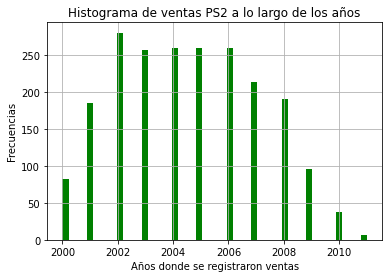

In [20]:
sub_ventas_ps2.hist('year_of_release', bins=50, color= 'green')
plt.title('Histograma de ventas PS2 a lo largo de los años')
plt.xlabel('Años donde se registraron ventas')
plt.ylabel('Frecuencias')
plt.show()

A lo largo del período que va desde 1980 hasta el 2016 podemos observar que se registran ventas a partir del año 2000 que es precisamente el año de lanzamiento de la consola de PS2, pero es en 2002 cuando se registra la mayor cantidad de ventas, luego se mantiene estable por encima de 250 hasta el 2006 y ahí empiezan a caer las ventas y ya para el 2010 las ventas fueron bastante bajas. 

### Ventas X360 <a id='x360'></a>

In [21]:
#Ventas X360

sub_ventas= sub_ventas_mayores[['platform', 'year_of_release','total_sales']]
sub_ventas_x360= sub_ventas.query('platform == "X360"')
sub_ventas_x360['year_of_release'].describe()


count    1232.000000
mean     2009.880682
std         2.458339
min      2005.000000
25%      2008.000000
50%      2010.000000
75%      2011.000000
max      2016.000000
Name: year_of_release, dtype: float64

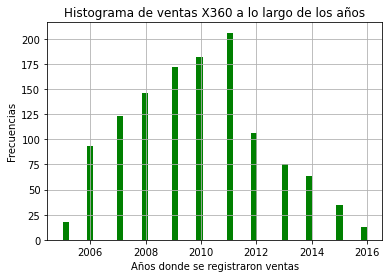

In [22]:
sub_ventas_x360.hist('year_of_release', bins=50,color= 'green')
plt.title('Histograma de ventas X360 a lo largo de los años')
plt.xlabel('Años donde se registraron ventas')
plt.ylabel('Frecuencias')
plt.show()


A lo largo del período que va desde 1980 hasta el 2016 podemos observar que se registran ventas a partir del año 2005 que es precisamente el año de lanzamiento de la consola X360, a partir de ahí las ventas fueron en ascenso hasta el 2011 cuando se registran la mayor cantidad de ventas, a partir de 2012 las ventas empiezan a caer hasta el 2016 donde se registran los valores mínimos. 

### Ventas PS3 <a id='ps3'></a>

In [23]:
#Ventas PS3

sub_ventas= sub_ventas_mayores[['platform', 'year_of_release','total_sales']]
sub_ventas_ps3= sub_ventas.query('platform == "PS3"')
sub_ventas_ps3['year_of_release'].describe()

count    1306.000000
mean     2010.840735
std         2.459616
min      2006.000000
25%      2009.000000
50%      2011.000000
75%      2013.000000
max      2016.000000
Name: year_of_release, dtype: float64

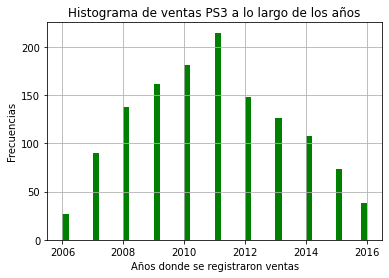

In [24]:
sub_ventas_ps3.hist('year_of_release', bins=50, color= 'green')
plt.title('Histograma de ventas PS3 a lo largo de los años')
plt.xlabel('Años donde se registraron ventas')
plt.ylabel('Frecuencias')
plt.show()

A lo largo del período que va desde 1980 hasta el 2016 podemos observar que se registran ventas apartir del 2006 cuando ocurre su lanzamiento oficial, las ventas siguen creciendo a lo largo de los años hasta el 2011 donde se registra el pico más alto de ventas y a partir de 2012 ya las ventas comienzan a caer  pero en 2016 aún se registran ventas. 

### Ventas Wii <a id='wii'></a>

In [25]:
#Ventas Wii

sub_ventas= sub_ventas_mayores[['platform', 'year_of_release','total_sales']]
sub_ventas_wii= sub_ventas.query('platform == "Wii"')
sub_ventas_wii['year_of_release'].describe()

count    1286.000000
mean     2008.966563
std         1.542034
min      2006.000000
25%      2008.000000
50%      2009.000000
75%      2010.000000
max      2016.000000
Name: year_of_release, dtype: float64

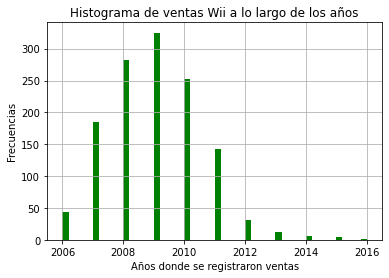

In [26]:
sub_ventas_wii.hist('year_of_release', bins=50, color= 'green')
plt.title('Histograma de ventas Wii a lo largo de los años')
plt.xlabel('Años donde se registraron ventas')
plt.ylabel('Frecuencias')
plt.show()

A lo largo del período que va desde 1980 hasta el 2016 podemos observar que se registran ventas a partir del año 2006 luego las ventas siguen creciendo a lo largo de los años hasta el 2009 donde se registra el pico más alto de ventas y a partir de 2010 ya las ventas comienzan a caer considerablemente y ya en 2016 las ventas fueron muy bajas.

In [27]:
sub_ventas['year_of_release'].describe()

count    9262.000000
mean     2006.758799
std         4.514636
min      1985.000000
25%      2005.000000
50%      2008.000000
75%      2010.000000
max      2016.000000
Name: year_of_release, dtype: float64

In [28]:
# Calcula la media y la varianza de year_of_release

sub_ventas_mean= sub_ventas['year_of_release'].mean()
sub_ventas_variance= np.var(sub_ventas['year_of_release'])
sub_ventas_std= np.sqrt(sub_ventas_variance)
print((f'Media de año de lanzamiento: {sub_ventas_mean}'))
print((f'Varianza de la cantidad de años: {sub_ventas_variance}'))
print((f'Desviación estándar de la cantidad de años: {sub_ventas_std}'))

Media de año de lanzamiento: 2006.758799395379
Varianza de la cantidad de años: 20.379740644491104
Desviación estándar de la cantidad de años: 4.514392610805036


### Conclusiones ventas <a id='conclu_ventas'></a>

- Luego de observar las distribución de las consolas que solían ser las mas populares se puede concluir que las PS2 en la actualidad ya no registra ventas, seguida por la plataforma Wii que registra algunas ventas pero son mínimas.
También se puede concluir que la X360 a pesar de los años que tiene en el mercado aún registran ventas, pero sin duda es la PS3 la que se mantiene más vigente a pesar de tener 10 años en el mercado aún se registran ventas considerables. 

- Con el dato de las desviación estándar que indica la dispersión de los datos podemos decir que aproximadamente cada 4.480573807135016 años tardan en aparecer las nuevas plataformas.

- Al observar las distribuciones de las ventas de cada una de las consolas estudiadas se puede concluir que las plataformas generalmente tardan generalmente entre 10 y 12 años en desparacer y quedó demostrado que la plataforma Wii tuvo una vida util bastante mas corta de lo esperado. 

- También se puede notar que el período de mayor ventas de las plataformas nuevas es de aproximadamente  5 años (dato obtenido de la desviación estándar) a partir de su fecha de lanzamiento, por lo que se toma el período desde 2012 hasta 2016 para construir un modelo para 2017.

## Nuevo conjunto de datos <a id='nuevo'></a>

In [29]:
new_games= games.query('year_of_release >= 2012')
new_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2886 entries, 16 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2886 non-null   object 
 1   platform         2886 non-null   object 
 2   year_of_release  2886 non-null   int64  
 3   genre            2886 non-null   object 
 4   na_sales         2886 non-null   float64
 5   eu_sales         2886 non-null   float64
 6   jp_sales         2886 non-null   float64
 7   other_sales      2886 non-null   float64
 8   critic_score     1312 non-null   float64
 9   user_score       1663 non-null   float64
 10  rating           2886 non-null   object 
 11  total_sales      2886 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 293.1+ KB


In [30]:
# Muestra de datos
new_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,TBD,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,TBD,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79


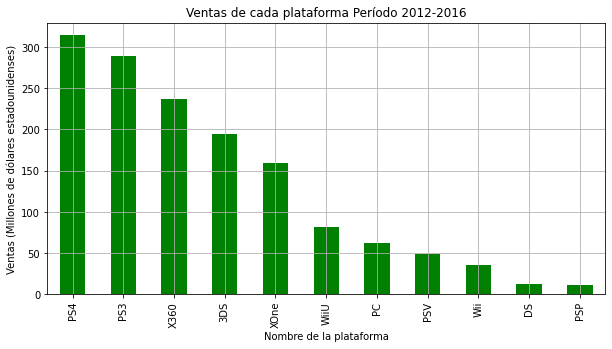

In [31]:
# Calcular las ventas cada plataforma. 

total_sales_games= new_games.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
total_sales_games.plot(kind='bar',title= 'Ventas de cada plataforma Período 2012-2016',color='green',
                               grid=True,figsize=(10,5))
plt.ylabel('Ventas (Millones de dólares estadounidenses)')
plt.xlabel('Nombre de la plataforma')
plt.show()

Se puede observar que las plataformas con más ventas son: PS4, PS3, X360,3DS, las que tuvieron unas ventas con valores medios son: XOne y WiiU por el contrario las de menor ventas son: PC, PSV, Wii,  DC y PSP cuyas ventas son menores a 50 (Expresados en millones de dólares estadounidenses)

Se seleccionan las plataformas PS4, PS3, X360 y 3DS para el análisis ya que tienen una mayor cantidad de ventas.

### Ventas PS4 <a id='ps4'></a>

In [32]:
#Subconjunto con las plataformas con mayores ventas
sub_ventas_new= new_games.query('platform == "PS4" | platform == "PS3" | platform == "X360" | platform == "3DS"')

#Ventas PS4

sub_ventas_new_1= sub_ventas_new[['platform', 'year_of_release','total_sales']]
sub_ventas_ps4= sub_ventas_new_1.query('platform == "PS4"')
sub_ventas_ps4['year_of_release'].describe()


count     392.000000
mean     2015.145408
std         0.868181
min      2013.000000
25%      2015.000000
50%      2015.000000
75%      2016.000000
max      2016.000000
Name: year_of_release, dtype: float64

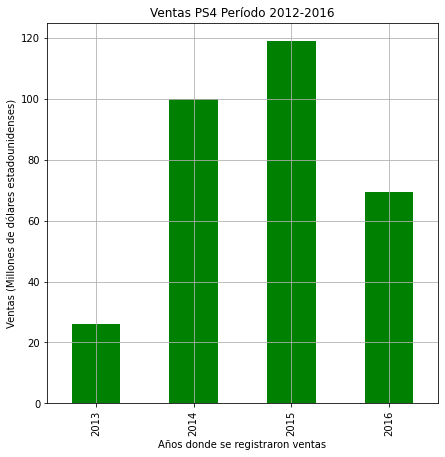

In [33]:
sub_ventas_ps4= sub_ventas_ps4.groupby('year_of_release')['total_sales'].sum()
sub_ventas_ps4.plot(kind='bar',title= 'Ventas PS4 Período 2012-2016',color= 'green',
                   grid=True,figsize=(7,7))
plt.xlabel('Años donde se registraron ventas')
plt.ylabel('Ventas (Millones de dólares estadounidenses)')
plt.show()

A lo largo del período que va desde 2012 hasta el 2016 podemos observar que se registran ventas a partir del año 2013 que es precisamente el año de lanzamiento de la consola PS4, a partir de ahí las ventas fueron en ascenso hasta el 2015 cuando se recaudó más dinero por sus ventas.

### Ventas PS3 <a id='ps3_n'></a>

In [34]:
#Ventas PS3

sub_ventas_new_1= sub_ventas_new[['platform', 'year_of_release','total_sales']]
sub_ventas_ps3= sub_ventas_new_1.query('platform == "PS3"')
sub_ventas_ps3['year_of_release'].describe()

count     493.000000
mean     2013.446247
std         1.268622
min      2012.000000
25%      2012.000000
50%      2013.000000
75%      2014.000000
max      2016.000000
Name: year_of_release, dtype: float64

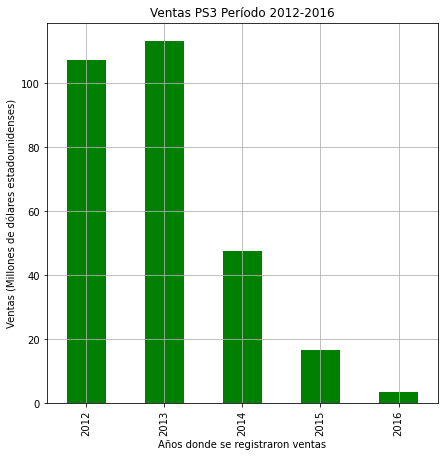

In [35]:
sub_ventas_ps3= sub_ventas_ps3.groupby('year_of_release')['total_sales'].sum()
sub_ventas_ps3.plot(kind='bar',title= 'Ventas PS3 Período 2012-2016',color= 'green',
                   grid=True,figsize=(7,7))
plt.xlabel('Años donde se registraron ventas')
plt.ylabel('Ventas (Millones de dólares estadounidenses)')
plt.show()

A lo largo del período que va desde 2012 hasta el 2016 podemos observar que ya en el 2012 se registran ventas muy altas y es en 2013 donde se encuentra su pico más alto, ya a partir de 2014 comienzan a bajar las ventas por lo que en el 2016 ya está en su pico más bajo. 

### Ventas X360 <a id='x360_n'></a>

In [36]:
#Ventas X360

sub_ventas_new_1= sub_ventas_new[['platform', 'year_of_release','total_sales']]
sub_ventas_x360= sub_ventas_new_1.query('platform == "X360"')
sub_ventas_x360['year_of_release'].describe()

count     292.000000
mean     2013.226027
std         1.188551
min      2012.000000
25%      2012.000000
50%      2013.000000
75%      2014.000000
max      2016.000000
Name: year_of_release, dtype: float64

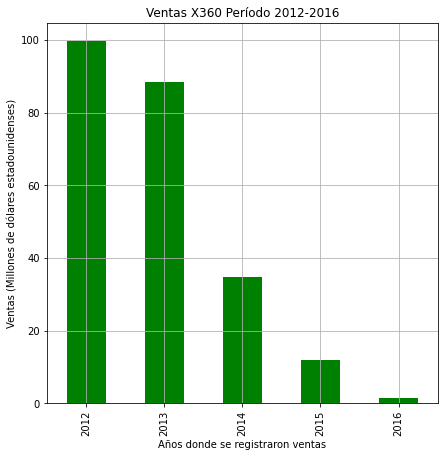

In [37]:
sub_ventas_x360= sub_ventas_x360.groupby('year_of_release')['total_sales'].sum()
sub_ventas_x360.plot(kind='bar',title= 'Ventas X360 Período 2012-2016',color= 'green',
                   grid=True,figsize=(7,7))
plt.xlabel('Años donde se registraron ventas')
plt.ylabel('Ventas (Millones de dólares estadounidenses)')
plt.show()

A lo largo del período que va desde 2012 hasta el 2016 podemos observar que ya en el 2012 se registran ventas muy altas y es ahí precisamente donde se encuentra su pico más alto, ya a partir de 2013 comienzan a bajar las ventas por lo que en el 2016 ya está en su pico más bajo. 

### Ventas 3DS <a id='3ds'></a>

In [38]:
#Ventas 3DS

sub_ventas_new_1= sub_ventas_new[['platform', 'year_of_release','total_sales']]
sub_ventas_3ds= sub_ventas_new_1.query('platform == "3DS"')
sub_ventas_3ds['year_of_release'].describe()

count     396.000000
mean     2013.750000
std         1.339044
min      2012.000000
25%      2013.000000
50%      2014.000000
75%      2015.000000
max      2016.000000
Name: year_of_release, dtype: float64

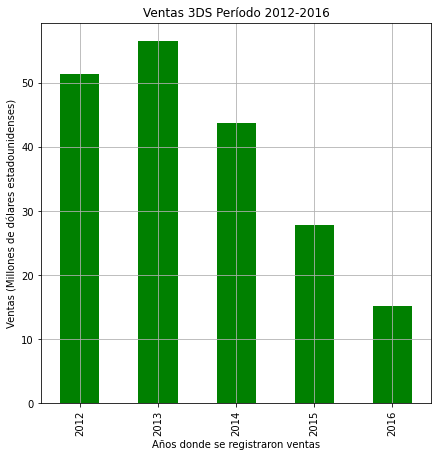

In [39]:
sub_ventas_3ds= sub_ventas_3ds.groupby('year_of_release')['total_sales'].sum()
sub_ventas_3ds.plot(kind='bar',title= 'Ventas 3DS Período 2012-2016',color= 'green',
                   grid=True,figsize=(7,7))
plt.xlabel('Años donde se registraron ventas')
plt.ylabel('Ventas (Millones de dólares estadounidenses)')
plt.show()

A lo largo del período que va desde 2012 hasta el 2016 podemos observar que ya en el 2012 se registran ventas muy altas al igual que en 2013 y es ahí precisamente donde se encuentra su pico más alto, ya a partir de 2014 comienzan a bajar las ventas por lo que en el 2016 ya está en su pico más bajo, pero de igual manera mantiene unas ventas significativas. 

Se van a estudiar las plataformas que tienen mayores ventas medias XOne y WiiU para determinar si sus ventas van en subida o en bajada. 

### Ventas XOne <a id='xone'></a>

In [40]:
sub_ventas_new_2= new_games.query('platform == "XOne" | platform == "WiiU"')

#Ventas XOne

sub_ventas_new_3= sub_ventas_new_2[['platform', 'year_of_release','total_sales']]
sub_ventas_xone= sub_ventas_new_3.query('platform == "XOne"')
sub_ventas_xone['year_of_release'].describe()

count     247.000000
mean     2014.951417
std         0.952995
min      2013.000000
25%      2014.000000
50%      2015.000000
75%      2016.000000
max      2016.000000
Name: year_of_release, dtype: float64

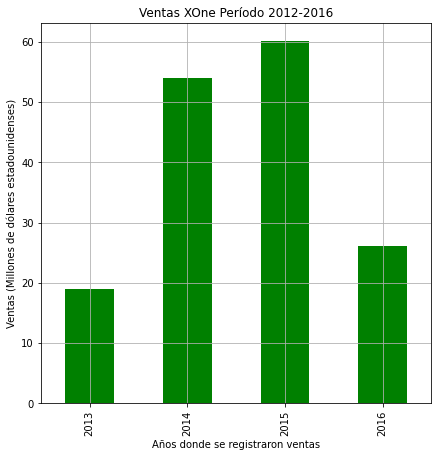

In [41]:
sub_ventas_xone= sub_ventas_xone.groupby('year_of_release')['total_sales'].sum()
sub_ventas_xone.plot(kind='bar',title= 'Ventas XOne Período 2012-2016',color= 'green',
                   grid=True,figsize=(7,7))
plt.xlabel('Años donde se registraron ventas')
plt.ylabel('Ventas (Millones de dólares estadounidenses)')
plt.show()

A lo largo del período que va desde 2012 hasta el 2016 podemos observar que a partir del 2013 se registran ventas, estas van subiendo a lo largo de los años hasta el 2015 donde se encuentra el pico mas alto. 

### Ventas WiiU <a id='wiiu'></a>

In [42]:
#Ventas WiiU

sub_ventas_new_3= sub_ventas_new_2[['platform', 'year_of_release','total_sales']]
sub_ventas_wiiu= sub_ventas_new_3.query('platform == "WiiU"')
sub_ventas_wiiu['year_of_release'].describe()

count     147.000000
mean     2013.659864
std         1.274065
min      2012.000000
25%      2013.000000
50%      2013.000000
75%      2015.000000
max      2016.000000
Name: year_of_release, dtype: float64

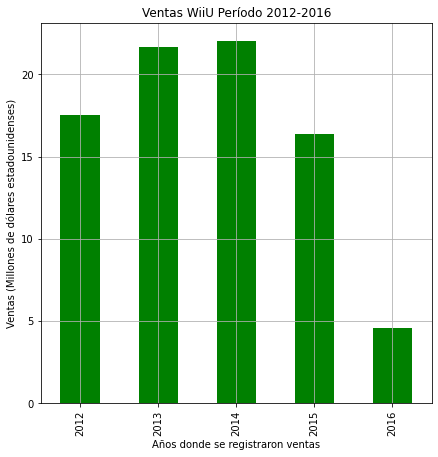

In [43]:
sub_ventas_wiiu= sub_ventas_wiiu.groupby('year_of_release')['total_sales'].sum()
sub_ventas_wiiu.plot(kind='bar',title= 'Ventas WiiU Período 2012-2016',color= 'green',
                   grid=True,figsize=(7,7))
plt.xlabel('Años donde se registraron ventas')
plt.ylabel('Ventas (Millones de dólares estadounidenses)')
plt.show()

A lo largo del período que va desde 2012 hasta el 2016 podemos observar que ya en el 2012 se registran ventas altas al igual que en 2013 y es en 2014 donde se encuentra su pico más alto, la baja en las ventas no es tan considerable durante el 2015, pero ya en 2016 sufre una caída significativa. 

### Conclusiones <a id='conclu_nuevo'></a>

Luego de observar la distribución de las plataformas con ventas altas y medias se puede concluir que la PS4 y la XOne se encuentran en un buen momento de ventas en el año 2015 tuvieron su pico de ventas y en 2016 mantienen unas ventas significativas por encima de las otras plataformas y por el contrario las plataformas PS3, X360, 3DS y WiiU en el año 2016 experimentaron una caida en sus ventas y se encuentran en sus mínimos históricos.

## Estudio de ventas globales <a id='estudiar_ventas'></a>

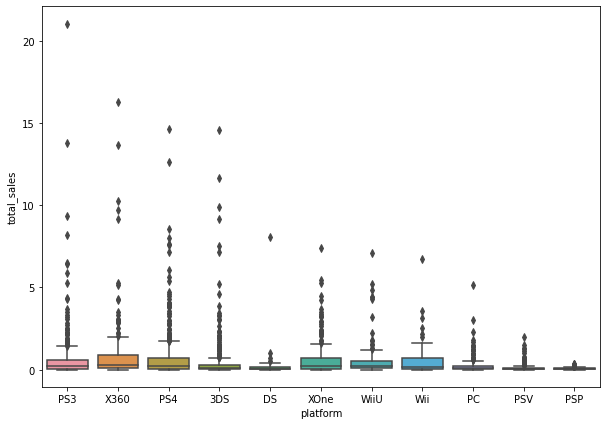

In [44]:
#Diagrama de caja ventas globales por plataforma
var1='platform'
subconjunto1= new_games[['platform','total_sales']]
f, ax = plt.subplots(figsize=(10, 7))
grafico_ventas_globales= sns.boxplot(x=var1, y='total_sales', data=subconjunto1)


Se pueden observar diferencias significativas entre algunas plataformas la PS3, X360, PS4, Xone, WiiU y la Wii tienen diagramas de cajas parecidos pero, las plataformas que registran las ventas mas altas que son PS3, X360, PS4 Y 3DS tienen valores atípicos muy altos donde resalta la PS3 con valores atípicos hasta por encima de los 20 (expresados en millones de dolares estadounidenses; las plataformas con ventas menores no se puede visualizar su Q1, Q3 y mediana ya que están practicamente en el mismo valor, estas plataformas también tienen valores atípicos pero con valores mas bajos. 

## Correlación entre las reseñas y las ventas <a id='correlacion'></a>

### Estudio de correlación entre las reseñas de usuarios y las ventas <a id='usuarios'></a>

In [45]:
# Matriz de correlación 

In [46]:
new_games['user_score'].corr(new_games['total_sales'])

0.09785396943864565

<AxesSubplot:title={'center':'Correlación entre las reseñas de usuarios y las ventas de la PS4'}, xlabel='user_score', ylabel='total_sales'>

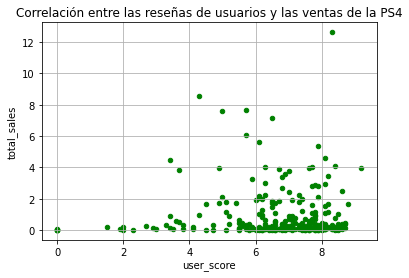

In [79]:
# Correlación entre las reseñas de usuarios y las ventas de la plataforma PS4
score_usu_ps4= new_games.query('platform == "PS4"')
score_usu_ps4.plot(x='user_score',y='total_sales',kind='scatter',
                   title= 'Correlación entre las reseñas de usuarios y las ventas de la PS4',grid=True,
                   figsize=(6,4),color= 'green')

Como se puede observar en el gráfico de dispersión donde se estudia la relación entre las reseñas de los usuarios y las ventas de una de las plataformas más populares como lo es la PS4 que existe una correlación muy débilmente positiva y se comprueba con el calculo de las matriz de correlación cuyo resultado fue 0.09785396943864565, también podemos ver que tenemos algunos puntos dispersos que nos señalan que tenemos valores atípicos.  

### Estudio de correlación entre las reseñas de los críticos y las ventas <a id='criticos'></a>

In [48]:
# Matriz de correlación 
new_games['critic_score'].corr(new_games['total_sales'])

0.308196745920778

<AxesSubplot:title={'center':'Correlación entre las reseñas de los críticos y las ventas de la PS4'}, xlabel='critic_score', ylabel='total_sales'>

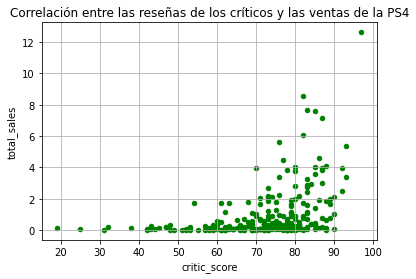

In [80]:
# Correlación entre las reseñas de los críticos y las ventas de la plataforma PS4
score_crit_ps4= new_games.query('platform == "PS4"')
score_crit_ps4.plot(x='critic_score',y='total_sales',kind='scatter',
                    title= 'Correlación entre las reseñas de los críticos y las ventas de la PS4',grid=True,
                    figsize=(6,4),color= 'green')

Como se puede observar en el gráfico de dispersión donde se estudia la correlación entre las reseñas de los críticos y las ventas de una de las plataformas más populares como lo es la PS4 que existe una correlación débilmente positiva y se comprueba con el calculo de las matriz de correlación cuyo resultado fue 0.308196745920778, también podemos ver que tenemos algunos puntos dispersos que nos señalan que tenemos valores atípicos.  

### Conclusiones <a id='conclu_reseñas'></a>

Después de calcular las matrices de correlación y realizar los gráficos de dispersión se puede concluir que existe una debil correlación entre las ventas y las críticas tanto de los usuarios como de los críticos así que no se le puede atribuir el éxito de esta plataforma directamente a esta variable. 

## Estudio de ventas por juegos <a id='estudiar'></a>

In [50]:
new_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,TBD,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,TBD,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79


In [51]:
#Calcular las ventas por juegos 
ventas_juegos= new_games[['name','platform','total_sales']]
ventas_juegos_sum= ventas_juegos.groupby('name')['total_sales'].sum().to_frame().reset_index()
ventas_juegos_sum.sort_values(by='total_sales', ascending=False)

,name,total_sales
559,Grand Theft Auto V,56.58
183,Call of Duty: Black Ops II,29.40
184,Call of Duty: Ghosts,27.39
182,Call of Duty: Black Ops 3,25.67
879,Minecraft,24.16
...,...,...
1249,Shinobi Koutsutsu,0.01
1293,Sousaku Alice to Oujisama!,0.01
119,Balloon Pop 2,0.01
1545,Tsukigime Ranko's Longest Day,0.01


Se estudiaran los 5 juegos con mayores ventas en las plataformas PS4 y XOne que son las platafaformas con mejores ventas del período.
- Grand Theft Auto V
- Call of Duty: Black Ops II
- Call of Duty: Ghosts
- Call of Duty: Black Ops 3
- Minecraft

### Juegos en PS4 <a id='juegos_ps4'></a>

In [52]:
ventas_juegos= new_games[['name','platform','total_sales','year_of_release']]
sub_ventas_1= ventas_juegos.query('name == "Grand Theft Auto V" | name == "Call of Duty: Black Ops II" | name== "Call of Duty: Ghosts" | name== "Call of Duty: Black Ops 3" | name== "Minecraft" ')
sub_ventas_ps4= sub_ventas_1.query('platform == "PS4"')
sub_ventas_ps4

,name,platform,total_sales,year_of_release
31,Call of Duty: Black Ops 3,PS4,14.63,2015
42,Grand Theft Auto V,PS4,12.62,2014
261,Minecraft,PS4,4.32,2014
323,Call of Duty: Ghosts,PS4,3.83,2013


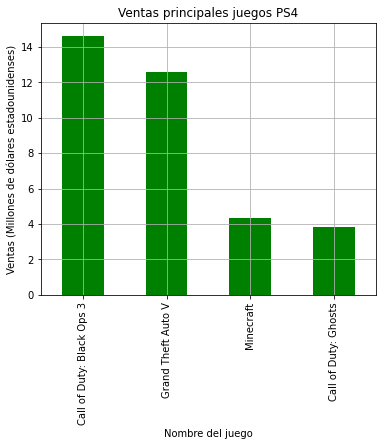

In [53]:
sub_ventas_ps4_grafico= sub_ventas_ps4.groupby('name')['total_sales'].sum().sort_values(ascending=False)
sub_ventas_ps4_grafico.reset_index()

sub_ventas_ps4_grafico.plot(kind='bar',title= 'Ventas principales juegos PS4',color='green',
                               grid=True,figsize=(6,5))
plt.ylabel('Ventas (Millones de dólares estadounidenses)')
plt.xlabel('Nombre del juego')
plt.show()


Los juego más vendidos en la plataforma PS4 son Call of Duty: Black Ops 3 y Grand Theft Auto V.

### Juegos en XOne <a id='juegos_xone'></a>

In [54]:
ventas_juegos= new_games[['name','platform','total_sales','year_of_release']]
sub_ventas_1= ventas_juegos.query('name == "Grand Theft Auto V" | name == "Call of Duty: Black Ops II" | name== "Call of Duty: Ghosts" | name== "Call of Duty: Black Ops 3" | name== "Minecraft" ')
sub_ventas_xone= sub_ventas_1.query('platform == "XOne"')
sub_ventas_xone

,name,platform,total_sales,year_of_release
99,Call of Duty: Black Ops 3,XOne,7.39,2015
165,Grand Theft Auto V,XOne,5.47,2014
493,Call of Duty: Ghosts,XOne,2.92,2013
543,Minecraft,XOne,2.76,2014


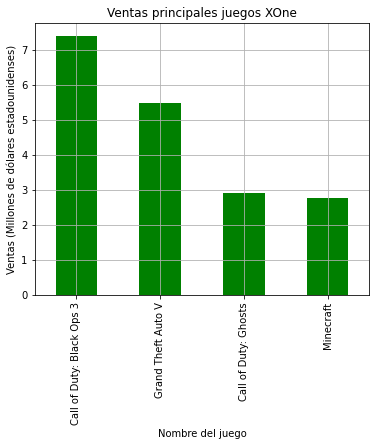

In [55]:
sub_ventas_xone_grafico= sub_ventas_xone.groupby('name')['total_sales'].sum().sort_values(ascending=False)
sub_ventas_xone_grafico.reset_index()

sub_ventas_xone_grafico.plot(kind='bar',title= 'Ventas principales juegos XOne',color='green',
                               grid=True,figsize=(6,5))
plt.ylabel('Ventas (Millones de dólares estadounidenses)')
plt.xlabel('Nombre del juego')
plt.show()


Los juego más vendidos en la plataforma PS4 son Call of Duty: Black Ops 3 y Grand Theft Auto V.

### Conclusiones<a id='conclu_juegos'></a>

En ambas plataformas los juegos mas vendidos son Call of Duty: Black Ops 3 y Grand Theft Auto V, sin embargo en la plataforma PS4 las ventas son mayores que en la XOne.

## Distribución general de los juegos por género<a id='distribucion'></a>

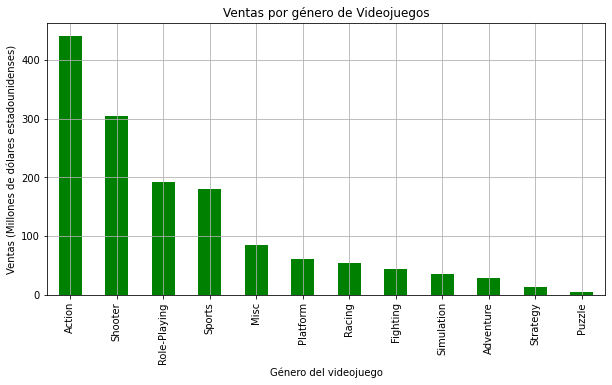

In [56]:
ventas_genero= new_games[['name','genre','total_sales']]
ventas_genero_sum= ventas_genero.groupby('genre')['total_sales'].sum().sort_values(ascending=False)
ventas_genero_sum.plot(kind='bar',title= 'Ventas por género de Videojuegos',color='green',
                               grid=True,figsize=(10,5))
plt.ylabel('Ventas (Millones de dólares estadounidenses)')
plt.xlabel('Género del videojuego')
plt.show()

Se puede observar que los géneros más restables son: Action, Shooter, Role-Playing y Sports, Mientras que los que tuvieron menos ventas son: Misc, Platform, Racing, Fighting, Simulation, Adventure, Strategy, Puzzle en ese orden.     

Se seleccionan los géneros Action, Shooter, Role-Playing y Sports para el análisis ya que tienen una mayor cantidad de ventas.

### Género acción<a id='accion'></a>

In [57]:
#Subconjunto con los géneros más rentables
sub_generos= new_games.query('genre == "Action" | genre == "Shooter" | genre == "Role-Playing" | genre == "Sports"')

#Acción
sub_generos_action= sub_generos.query('genre == "Action"')
sub_action= sub_generos_action[['name','genre','total_sales']]
sub_action_sum= sub_action.groupby('name')['total_sales'].sum().reset_index()
sub_action_sum.sort_values(by='total_sales', ascending=False)


,name,total_sales
200,Grand Theft Auto V,56.58
157,FIFA Soccer 13,15.97
30,Assassin's Creed IV: Black Flag,13.06
28,Assassin's Creed III,13.01
495,The Last of Us,10.58
...,...,...
531,Tsuyo Kiss 3 Portable,0.01
189,GoGo's Crazy Bones,0.01
191,God Eater Off Shot: Tachibana Sakuya-hen Twin ...,0.01
538,Unending Bloody Call,0.01


Como se puede observar el videojuego del género acción que tiene la mayor cantidad de ventas es Grand Theft Auto V que es precisamente uno de los juegos más vendidos tanto en PS4 como en XOne.

También es conveniente resaltar que el videojuego FIFA Soccer 13 se encuentra equivocadamente en la categoría Action y su categoría correcta es Sports, esto no afecta el resultado global pero es importante resaltarlo.

### Género Shooter<a id='shooter'></a>

In [58]:
#Shooter
sub_generos_shooter= sub_generos.query('genre == "Shooter"')
sub_shooter= sub_generos_shooter[['name','genre','total_sales']]
sub_shooter_sum= sub_shooter.groupby('name')['total_sales'].sum().reset_index()
sub_shooter_sum.sort_values(by='total_sales', ascending=False)

,name,total_sales
19,Call of Duty: Black Ops II,29.40
20,Call of Duty: Ghosts,27.39
18,Call of Duty: Black Ops 3,25.67
17,Call of Duty: Advanced Warfare,21.97
7,Battlefield 4,13.94
...,...,...
4,Assault Suit Leynos,0.02
90,Touhou Genso Rondo: Bullet Ballet,0.02
79,Super Stardust Ultra VR,0.01
30,DoDonPachi Saidaioujou,0.01


Como se puede observar el videojuego del género shooter que tiene la mayor cantidad de ventas es Call of Duty: Black Ops II que se encuentra entre los más vendidos, seguido por Call of Duty: Ghosts y Call of Duty: Black Ops 3 que son los líderes en ventas en las plataformas mas populares. 

### Género Role-Playing<a id='role'></a>

In [59]:
#Role-Playing
sub_generos_role= sub_generos.query('genre == "Role-Playing"')
sub_role= sub_generos_role[['name','genre','total_sales']]
sub_role_sum= sub_role.groupby('name')['total_sales'].sum().reset_index()
sub_role_sum.sort_values(by='total_sales', ascending=False)

,name,total_sales
169,Pokemon X/Pokemon Y,14.60
76,Fallout 4,12.67
166,Pokemon Omega Ruby/Pokemon Alpha Sapphire,11.68
37,Diablo III,10.95
163,Pokemon Black 2/Pokemon White 2,8.06
...,...,...
264,Zillions of Enemy X: Zetsukai no Crusade,0.02
61,Dungeons 2,0.01
54,Dragon Quest X: All in One Package,0.01
176,Raven's Cry,0.01


Los videojuegos del género Role-Playing con mayores ventas no son de los más vendidos en las plataformas más populares.

### Género Sports<a id='sports'></a>

In [60]:
##Sport
sub_generos_sports= sub_generos.query('genre == "Sports"')
sub_sports= sub_generos_sports[['name','genre','total_sales']]
sub_sports_sum= sub_sports.groupby('name')['total_sales'].sum().reset_index()
sub_sports_sum.sort_values(by='total_sales', ascending=False)


,name,total_sales
10,FIFA 15,17.37
9,FIFA 14,16.46
11,FIFA 16,16.30
12,FIFA 17,11.48
53,NBA 2K16,7.98
...,...,...
64,Nike+ Kinect Training,0.03
2,Dead or Alive Xtreme 3: Venus,0.03
48,Mark McMorris Infinite Air,0.02
4,Dino Dini's Kick Off Revival,0.02


Los videojuegos del género Sports con mayores ventas no son de los más vendidos en las plataformas más populares.

In [61]:
# Calculo de cuota de ventas de los géneros mas populares

ventas_totales= new_games['total_sales'].sum()

ventas_accion= new_games.query('genre == "Action"')
ventas_accion_1= ventas_accion['total_sales'].sum()

ventas_shooter= new_games.query('genre == "Shooter"')
ventas_shooter_1= ventas_shooter['total_sales'].sum()


ventas_role= new_games.query('genre == "Role-Playing"')
ventas_role_1= ventas_role['total_sales'].sum()


ventas_sports= new_games.query('genre == "Sports"')
ventas_sports_1= ventas_sports['total_sales'].sum()


print((f'La cuota de venta que aporta el género Action al total es de: {(ventas_accion_1/ventas_totales):.1%}'))
print((f'La cuota de venta que aporta el género Shooter al total es de: {(ventas_shooter_1/ventas_totales):.1%}'))
print((f'La cuota de venta que aporta el género Role-Playing al total es de: {(ventas_role_1/ventas_totales):.1%}'))
print((f'La cuota de venta que aporta el género Sports al total es de: {(ventas_sports_1/ventas_totales):.1%}'))


La cuota de venta que aporta el género Action al total es de: 30.5%
La cuota de venta que aporta el género Shooter al total es de: 21.1%
La cuota de venta que aporta el género Role-Playing al total es de: 13.3%
La cuota de venta que aporta el género Sports al total es de: 12.5%


### Conclusiones<a id='conclu_generos'></a>

- El videojuego del género acción que tiene la mayor cantidad de ventas es Grand Theft Auto V que es precisamente uno de los juegos más vendidos tanto en PS4 como en XOne. 

- El videojuego del género shooter que tiene la mayor cantidad de ventas es Call of Duty: Black Ops II que se encuentra entre los más vendidos, seguido por Call of Duty: Ghosts y Call of Duty: Black Ops 3 que son los líderes en ventas en las plataformas mas populares. 

- Los videojuegos del género Role-Playing con mayores ventas no son de los más vendidos en las plataformas más populares.

- Los videojuegos del género Sports con mayores ventas no son de los más vendidos en las plataformas más populares.

- El género Action aporta el 30.5 % del total de las ventas.

- El género Shooter aporta el 21.1 % del total de las ventas.

- El género Role-Playing aporta el 13.3 % del total de las ventas

- El género Sports aporta el 12.5 % del total de las ventas

## Perfil de usuario por región<a id='perfil'></a>

### Región NA<a id='na'></a>

#### Plataformas principales<a id='Role-Playing'></a>

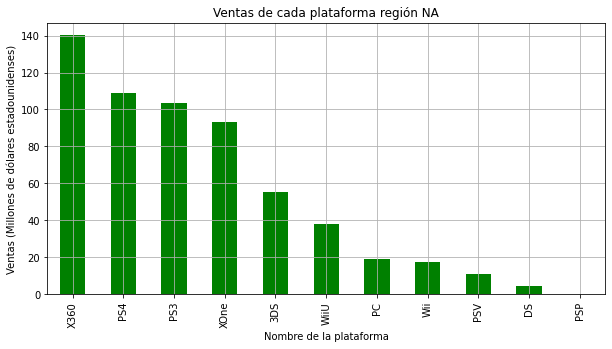

In [62]:
# Calcular las ventas cada plataforma. 

sales_platform_na= new_games.groupby('platform')['na_sales'].sum().sort_values(ascending=False)
sales_platform_na.plot(kind='bar',title= 'Ventas de cada plataforma región NA',color='green',
                               grid=True,figsize=(10,5))
plt.ylabel('Ventas (Millones de dólares estadounidenses)')
plt.xlabel('Nombre de la plataforma')
plt.show()

Las cinco plataformas principales de la región NA son X360, PS4, PS3, XOne y 3DS, la plataforma WiiU tiene unas ventas medias y entre las plataformas con menor popularidad tenemos Wii, PSV, DS también podemos observar que la plataforma PSP ya no tiene ventas en el período de estudio desde 2012 hasta 2016.  

#### Géneros principales<a id='Role-Playing'></a>

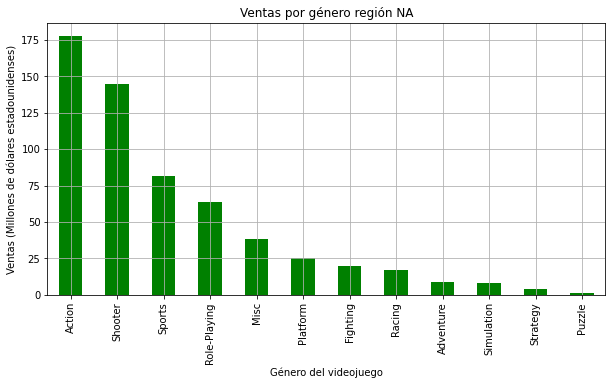

In [63]:
generos_na= new_games.groupby('genre')['na_sales'].sum().sort_values(ascending=False)
generos_na.plot(kind='bar',title= 'Ventas por género región NA',color='green',
                               grid=True,figsize=(10,5))
plt.ylabel('Ventas (Millones de dólares estadounidenses)')
plt.xlabel('Género del videojuego')
plt.show()

Los géneros más populares de la región NA son Action, Shooter, Sports, Role-Playing y Misc mientras los que tienen la menor popularidad en la región son Strategy y Puzzle.

#### Estudio de correlación entre las clasificaciones de ESRB y las ventas <a id='estudiar'></a>

In [64]:
rating_na = new_games.pivot_table(index='rating',values='na_sales',aggfunc=['count','sum'])
rating_na= rating_na.reset_index()
rating_na

,rating,count,sum
,,na_sales,na_sales
0,E,395,114.37
1,E10+,306,75.70
2,M,498,231.57
3,T,412,66.02
4,TBD,1275,103.31


Los videojuegos con la clasificación M (mayores de 17 años) son los que tienen mayores ventas promedios, mientras los videojuegos con clasificación T (mayores de 13 años) son los que tienen menores ventas.

### Región EU<a id='eu'></a>

#### Plataformas principales<a id='Role-Playing'></a>

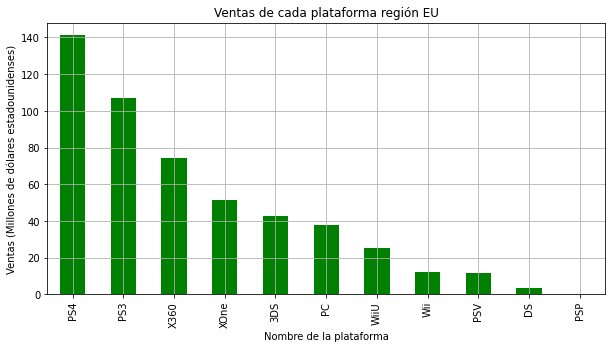

In [65]:
sales_platform_eu= new_games.groupby('platform')['eu_sales'].sum().sort_values(ascending=False)
sales_platform_eu.plot(kind='bar',title= 'Ventas de cada plataforma región EU',color='green',
                               grid=True,figsize=(10,5))
plt.ylabel('Ventas (Millones de dólares estadounidenses)')
plt.xlabel('Nombre de la plataforma')
plt.show()

Las cinco plataformas principales de la región EU son PS4, PS3, X360, XOne y 3DS, laS plataformaS PC y WiiU tienen unas ventas medias y entre las plataformas con menor popularidad tenemos Wii, PSV, DS también podemos observar que la plataforma PSP ya no tiene ventas en el período de estudio desde 2012 hasta 2016.  

#### Géneros principales<a id='Role-Playing'></a>

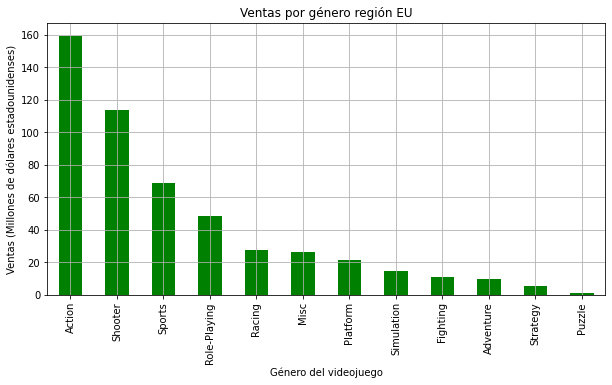

In [66]:
generos_eu= new_games.groupby('genre')['eu_sales'].sum().sort_values(ascending=False)
generos_eu.plot(kind='bar',title= 'Ventas por género región EU',color='green',
                               grid=True,figsize=(10,5))
plt.ylabel('Ventas (Millones de dólares estadounidenses)')
plt.xlabel('Género del videojuego')
plt.show()

Los géneros más populares de la región EU son Action, Shooter, Sports, Role-Playing y Racing, mientras los que tienen la menor popularidad en la región son Strategy y Puzzle.

#### Estudio de correlación entre las clasificaciones de ESRB y las ventas <a id='estudiar'></a>

In [67]:
rating_eu = new_games.pivot_table(index='rating',values='eu_sales',aggfunc=['count','sum'])
rating_eu= rating_eu.reset_index()
rating_eu

,rating,count,sum
,,eu_sales,eu_sales
0,E,395,113.03
1,E10+,306,55.37
2,M,498,193.96
3,T,412,52.96
4,TBD,1275,91.50


Los videojuegos con la clasificación M (mayores de 17 años) son los que tienen mayores ventas promedios, mientras los videojuegos con clasificación T (mayores de 13 años) son los que tienen menores ventas.

### Región JP<a id='jp'></a>

#### Plataformas principales<a id='Role-Playing'></a>

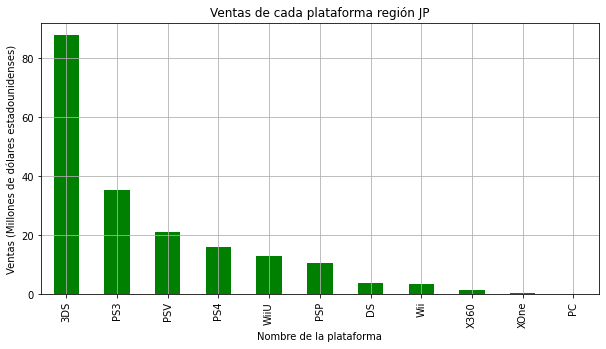

In [68]:
sales_platform_jp= new_games.groupby('platform')['jp_sales'].sum().sort_values(ascending=False)
sales_platform_jp.plot(kind='bar',title= 'Ventas de cada plataforma región JP',color='green',
                               grid=True,figsize=(10,5))
plt.ylabel('Ventas (Millones de dólares estadounidenses)')
plt.xlabel('Nombre de la plataforma')
plt.show()

Las cinco plataformas principales de la región JP son 3DS muy por encima de las demás, seguido por PS3, PSV, PS4 Y WiiU, la plataforma PSP tiene unas ventas medias y entre las plataformas con menor popularidad tenemos Wii, DS, X360, Xone, también podemos observar que la plataforma PC ya no tiene ventas en el período de estudio desde 2012 hasta 2016.  

#### Géneros principales<a id='Role-Playing'></a>

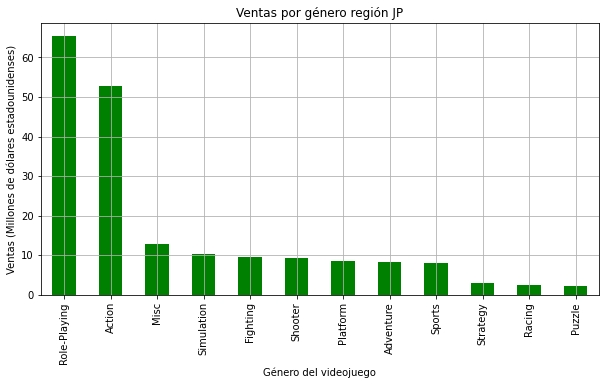

In [69]:
generos_jp= new_games.groupby('genre')['jp_sales'].sum().sort_values(ascending=False)
generos_jp.plot(kind='bar',title= 'Ventas por género región JP',color='green',
                               grid=True,figsize=(10,5))
plt.ylabel('Ventas (Millones de dólares estadounidenses)')
plt.xlabel('Género del videojuego')
plt.show()

Los géneros más populares de la región JP son Role-Playing , Action, estos muy por encima de los demás, seguidos por Misc, Simulation, Fighting y Shooter, mientras los que tienen la menor popularidad en la región son Strategy, racing y Puzzle.

#### Estudio de correlación entre las clasificaciones de ESRB y las ventas <a id='estudiar'></a>

In [70]:
rating_jp = new_games.pivot_table(index='rating',values='jp_sales',aggfunc=['count','sum'])
rating_jp= rating_jp.reset_index()
rating_jp

,rating,count,sum
,,jp_sales,jp_sales
0,E,395,28.33
1,E10+,306,8.19
2,M,498,21.20
3,T,412,26.02
4,TBD,1275,108.84


Los videojuegos con la clasificación a determinar TBD son los que tienen mayores ventas promedios, seguido por la clasificación E (mayores de 6 años) mientras los videojuegos E10+ (mayores de 10 años) son los que tienen los menores promedios de ventas.

### other Regiones <a id='other'></a>

#### Plataformas principales<a id='Role-Playing'></a>

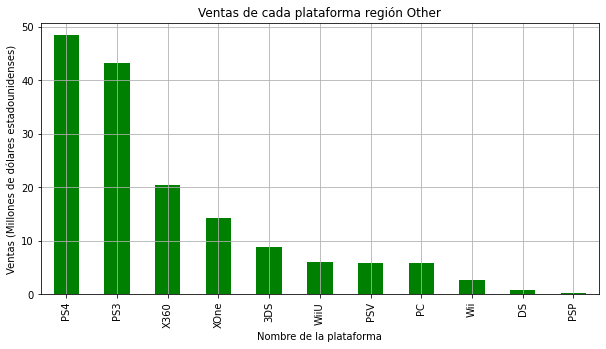

In [71]:
sales_platform_other= new_games.groupby('platform')['other_sales'].sum().sort_values(ascending=False)
sales_platform_other.plot(kind='bar',title= 'Ventas de cada plataforma región Other',color='green',
                               grid=True,figsize=(10,5))
plt.ylabel('Ventas (Millones de dólares estadounidenses)')
plt.xlabel('Nombre de la plataforma')
plt.show()

Las plataformas más populares de la región Other son PS4 , PS3, estos muy por encima de los demás, seguidos por X360, XOne, 3DS, mientras los que tienen la menor popularidad en la región son DS y PSP

#### Géneros principales<a id='Role-Playing'></a>

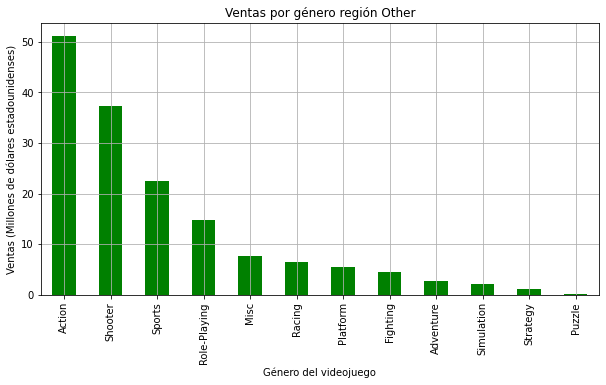

In [72]:
generos_other= new_games.groupby('genre')['other_sales'].sum().sort_values(ascending=False)
generos_other.plot(kind='bar',title= 'Ventas por género región Other',color='green',
                               grid=True,figsize=(10,5))
plt.ylabel('Ventas (Millones de dólares estadounidenses)')
plt.xlabel('Género del videojuego')
plt.show()

Los géneros más populares de la región Other son Action, Shooter, estos basatante por encima de los demás, seguidos por Sports, Role-Playing y Misc, mientras los que tienen la menor popularidad en la región son Strategy y Puzzle.

#### Estudio de correlación entre las clasificaciones de ESRB y las ventas <a id='estudiar'></a>

In [73]:
rating_other = new_games.pivot_table(index='rating',values='other_sales',aggfunc=['count','sum'])
rating_other= rating_other.reset_index()
rating_other

,rating,count,sum
,,other_sales,other_sales
0,E,395,31.44
1,E10+,306,16.23
2,M,498,63.38
3,T,412,17.94
4,TBD,1275,27.17


Los videojuegos con la clasificación M (mayores de 17 años) son los que tienen mayores ventas, mientras los videojuegos clasificación E10+ (mayores de 10 años) son los que tienen los menores promedios de ventas.

In [74]:
ventas_totales= new_games['total_sales'].sum() 
ventas_jp= new_games['jp_sales'].sum()
ventas_eu= new_games['eu_sales'].sum() 
ventas_na= new_games['na_sales'].sum()
ventas_other= new_games['other_sales'].sum()
print((f'La cuota de venta de la Región NA es: {(ventas_na/ventas_totales):.1%}'))
print((f'La cuota de venta de la Región Eu es: {(ventas_eu/ventas_totales):.1%}'))
print((f'La cuota de venta de la Región JP es: {(ventas_jp/ventas_totales):.1%}'))
print((f'La cuota de venta de la Región Other es: {(ventas_other/ventas_totales):.1%}'))


La cuota de venta de la Región NA es: 40.9%
La cuota de venta de la Región Eu es: 35.0%
La cuota de venta de la Región JP es: 13.3%
La cuota de venta de la Región Other es: 10.8%


### Conclusiones por Región <a id='conclu_regiones'></a>

- Las cinco plataformas principales de la región NA son X360, PS4, PS3, XOne y 3DS.
- Las cinco plataformas principales de la región EU son PS4, PS3, X360, XOne y 3DS.
- Las cinco plataformas principales de la región JP son 3DS muy por encima de las demás, seguido por PS3, PSV, PS4 Y WiiU. 
- Las cinco plataformas más populares de la región Other son PS4 , PS3, estos muy por encima de los demás, seguidos por X360, XOne y 3DS. 
- La principal variación entre las cuotas de mercado de las principales plataformas en las diferentes regiones se puede observar en la región JP donde la principal plataforma es la 3DS, con mucha diferencia por encima de las demás, esta plataforma si tiene popularidad en todas las regiones pero en la región JP es sin duda la mas popular.
- Luego tenemos la popularidad de la X360 en la región NA que tiene el primer lugar cosa que no ocurre en las otras regiones por ejemplo en la región JP no figura entre las más pulares.
- Por otro lado tenemos la presencia de la PS4 y la PS3 que tiene una presencia importante en todas las regiones.
- La XOne tampoco es muy popular en la región JP en su lugar la plataforma WiiU cuenta con popularidad, popularidad con la que no cuenta en todas las otras regiones estudiadas.
- Los géneros más populares de la región NA son Action, Shooter, Sports, Role-Playing y Misc.
- Los géneros más populares de la región EU son Action, Shooter, Sports, Role-Playing y Racing.
- Los géneros más populares de la región JP son Role-Playing , Action, estos muy por encima de los demás, seguidos por Misc, Simulation, Fighting y Shooter.
- Los géneros más populares de la región Other son Action, Shooter, estos basatante por encima de los demás, seguidos por Sports, Role-Playing y Misc.
- La pricipal diferencia en cuanto a géneros la podemos notar en la región JP cuyo género mas popular es Role-Playing, este género se encuentra entre el 4to y 5to lugar en todas las otras regiones estudiadas, esto puede explicar por qué este genéro figura entre los más populares en el estudio global y a su vez explica por que no figura en la popularidad de las pricipales plataformas que son PS4 y y XOne, ya que la plataforma más popular de esta región es la 3DS y además se puede relacionar con que la región Jp solo aporta el 13.3 de la recolección por ventas global, mientras que el peso mas grande lo tienen las regiones de NA y EU es por esto que las preferencias de estás regiones tienen un mayor peso. 

- En cuanto a la clasificación de los videojuegos podemos decir que en tres de las cuatro regiones estudiadas las mayores ventas se registraron en los videojuegos con clasificación M(+17) lo que ya no puede ir mostrando un indicio de las edades en las que se encuentran los principales consumidores de videojuegos. 

- La excepción ocurre nuevamente en la región JP cuyas ventas más altas se registran en los videojuegos que no cuentan con clasificación, seguidos por la clasificación E10+ (mayores de 10 años), podriamos decir que la población consumidora es más variada y amplia. 

## Probar las hipótesis estadísticas. <a id='hipotesis'></a>

**Hipótesis 1** <a id='hipotesis_1'></a>

- H0: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son iguales
- Ha: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC no son iguales
- alpha = 0.05 nivel crítico de significación estadística

In [77]:
# Prueba de hipótesis
sub_calif_plataformas= new_games[['user_score','platform']]
sub_calif_plataformas= sub_calif_plataformas.dropna()
#Conjunto de datos con las calificaciones de los usuarios a la plataforma XOne
sub_calif_xone= sub_calif_plataformas.query('platform == "XOne"')
hip_sub_calif_xone= sub_calif_xone['user_score']
#Conjunto de datos con las calificaciones de los usuarios a la plataforma PC
sub_calif_pc= sub_calif_plataformas.query('platform == "PC"')
hip_sub_calif_pc= sub_calif_pc['user_score']

alpha = 0.05

results = st.ttest_ind(hip_sub_calif_xone, hip_sub_calif_pc, equal_var= False)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No rechazamos la hipótesis nula") 


p-value:  0.5197773083212813
No rechazamos la hipótesis nula


Los datos proporcionan evidencia suficiente, dado el nivel de significación que seleccionamos, para no rechazar la hipótesis nula. Por lo tanto, podemos concluir que las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son iguales.

**Hipótesis 2** <a id='hipotesis_2'></a>

- H0: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes no son diferentes
- Ha: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes
- alpha = 0.05 nivel crítico de significación estadística

In [78]:
# Prueba de hipótesis
sub_calif_generos= new_games[['user_score','genre']]
sub_calif_generos= sub_calif_generos.dropna()
#Conjunto de datos con las calificaciones de los usuarios al género Action
sub_calif_action= sub_calif_generos.query('genre == "Action"')
hip_sub_calif_action= sub_calif_action['user_score']

#Conjunto de datos con las calificaciones de los usuarios al género Sports
sub_calif_sports= sub_calif_generos.query('genre == "Sports"')
hip_sub_calif_sports= sub_calif_sports['user_score']
sub_calif_sports

alpha = 0.05

results = st.ttest_ind(hip_sub_calif_action, hip_sub_calif_sports, equal_var= False)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No rechazamos la hipótesis nula") 


p-value:  1.1855920874620597e-11
Rechazamos la hipótesis nula


Los datos proporcionan evidencia suficiente, dado el nivel de significación que seleccionamos, para rechazar la hipótesis nula. Por lo tanto, podemos concluir que las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

## Conclusiones generales <a id='general'></a>

El estudio se basó en el estudio de un dataset que contenía información sobre los videojuegos, plataformas, año de lanzamiento, reseñas, clasificación del videojuego según la ESRB (Junta de clasificación de software de entretenimiento) además de uno de los puntos más importantes que son las ventas obtenidas por cada uno de estos videojuegos, estás ventas están clasificadas por Región NA (Norteamérica), EU (Europa), JP (Japón), mientras que los otros países están agrupados en la categoría Other, siempre estaremos hablando en millones de dólares estadounidenses. 

Los datos presentaban algunos problemas que debieron ser solventados antes de iniciar con el estudio; se renombraron las columnas para eliminar las letras mayúsculas, se ajustó el tipo de dato de la columna year_of_release a Datetime con su respectivo formato y se trataron los valores ausentes de las columnas Name, Year_of_Release, Genre, Critic_Score, User_Score y Rating. 

Al no poder calcular medias y medianas de la variable 'name' y 'genre' se decidió reemplazarlos por 'No disponible', de esta manera no se afectan los valores del resto de los datos, en la columna rating se colocó TBD que es la abreviatura de 'a determinar' ya que no se cuenta con la clasificación de estos videojuegos.

En la columna 'year_of_release' se decidió eliminar las filas con valores ausentes ya que no causaría un gran impacto en el conjunto de datos.

Los valores ausentes de 'critic_score' y 'user_score' se decidió mantenerlos, para de esta manera afectar lo menos posible los valores generales del conjunto de datos. 

Para enriquecer los datos se crea una nueva columna 'total_sales' que contiene la suma de total de las ventas de cada región NA, EU, JP y Other. 

El conjunto de datos contenía información desde 1980 hasta el 2016 así que se analizó esta información para encontrar algunos patrones y delimitar un poco la información para realizar un análisis mas efectivo y adaptado a la epoca:

- Es importante destacar que entre el 2005 y 2011 fueron los años de mayores lanzamientos de videojuegos, a partir de 2012 empiezan a disminuir pero se mantienen estables.

- En este análisis también se determinó que las plataformas mas populares a lo largo de los años PS2, X360, PS3, Wii y fue con el estudio de estás plataformas que se pudo determinar lo siguiente:

1- Las plataformas generalmente tardan generalmente entre 10 y 12 años en desparacer.

2- El período de mayor ventas de las plataformas nuevas es de aproximadamente 5 años (dato obtenido de la desviación estándar) a partir de su fecha de lanzamiento, por lo que se toma el período desde 2012 hasta 2016 para construir un modelo para 2017.

**A partir de este conjunto de datos mas pequeño (2012- 2016) se puede concluir lo siguiente:**

- Las plataformas con más ventas son: PS4, PS3, X360,3DS, las que tuvieron unas ventas con valores medios son: XOne y WiiU por el contrario las de menor ventas son: DC, PC, PSP, PSV y Wii cuyas ventas son menores a 50 (Expresados en millones de dólares estadounidenses)

- Luego de observar la distribución de las plataformas con ventas altas y medias se puede concluir que la PS4 y la XOne se encuentran en un buen momento de ventas en el año 2016 y por el contrario las plataformas PS3, X360, 3DS y WiiU en el año 2016 experimentaron una caida en sus ventas y se encuentran en sus mínimos históricos.

- Con la ayuda del gráfico de dispersión donde se estudia la correlación entre las reseñas de los usuarios y las ventas de una de las plataformas más populares como lo es la PS4 se determinó que existe una correlación muy débilmente positiva y se comprueba con el calculo de las matriz de correlación cuyo resultado fue 0.06213911208908458, también podemos ver que tenemos algunos puntos dispersos que nos señalan que tenemos valores atípicos.  

- Con la ayuda del gráfico de dispersión donde se estudia la correlación entre las reseñas de los críticos y las ventas de una de las plataformas más populares como lo es la PS4 que existe una correlación débilmente positiva y se comprueba con el calculo de las matriz de correlación cuyo resultado fue 0.2896591612195725, también podemos ver que tenemos algunos puntos dispersos que nos señalan que tenemos valores atípicos.  

- Se estudiaron los 5 juegos con mayores ventas en las plataformas PS4 y XOne que son las platafaformas con mejores ventas del período, estos juegos son: Grand Theft Auto V, Call of Duty: Black Ops II, Call of Duty: Ghosts, Call of Duty: Black Ops 3 y Minecraft y se concluyó que en ambas plataformas los juegos mas vendidos son Call of Duty: Black Ops 3 y Grand Theft Auto V, sin embargo en la plataforma PS4 las ventas son mayores que en la XOne.

- Se determinó que los géneros más restables son: Action, Shooter, Role-Playing y Sports, mientras que los que tuvieron menos ventas son: Misc, Platform, Racing, Fighting, Simulation, Adventure, Strategy, Puzzle en ese orden.  

- El videojuego del género acción que tiene la mayor cantidad de ventas es Grand Theft Auto V que es precisamente uno de los juegos más vendidos tanto en PS4 como en XOne.

- El videojuego del género shooter que tiene la mayor cantidad de ventas es Call of Duty: Black Ops II que se encuentra entre los más vendidos, seguido por Call of Duty: Ghosts y Call of Duty: Black Ops 3 que son los líderes en ventas en las plataformas mas populares, los videojuegos del género Role-Playing con mayores ventas no son de los más vendidos en las plataformas más populares, los videojuegos del género Sports con mayores ventas no son de los más vendidos en las plataformas más populares.

- El género Action aporta el 30.5 % del total de las ventas, Shooter aporta el 21.1 %, Role-Playing aporta el 13.3 % y Sports aporta el 12.5 % del total de las ventas. 

Se analizó muy detalladamente los datos por Región y de este estudio se desprende lo siguiente:

- Las cinco plataformas principales de la región NA son X360, PS4, PS3, XOne y 3DS.

- Las cinco plataformas principales de la región EU son PS4, PS3, X360, XOne y 3DS.

- Las cinco plataformas principales de la región JP son 3DS muy por encima de las demás, seguido por PS3, PSV, PS4 Y WiiU.

- Las cinco plataformas más populares de la región Other son PS4 , PS3, estos muy por encima de los demás, seguidos por X360, XOne y 3DS.

- La principal variación entre las cuotas de mercado de las principales plataformas en las diferentes regiones se puede observar en la región JP donde la principal plataforma es la 3DS, con mucha diferencia por encima de las demás, esta plataforma si tiene popularidad en todas las regiones pero en la región JP es sin duda la mas popular.

- Luego tenemos la popularidad de la X360 en la región NA que tiene el primer lugar cosa que no ocurre en las otras regiones por ejemplo en la región JP no figura entre las más pulares.

- Por otro lado tenemos la presencia de la PS4 y la PS3 que tiene una presencia importante en todas las regiones.

- La XOne tampoco es muy popular en la región JP en su lugar la plataforma WiiU cuenta con popularidad, popularidad con la que no cuenta en todas las otras regiones estudiadas

- La pricipal diferencia en cuanto a géneros la podemos notar en la región JP cuyo género mas popular es Role-Playing, este género se encuentra entre el 4to y 5to lugar en todas las otras regiones estudiadas, esto puede explicar por qué este genéro figura entre los más populares en el estudio global y a su vez explica por que no figura en la popularidad de las pricipales plataformas que son PS4 y y XOne, ya que la plataforma más popular de esta región es la 3DS y además se puede relacionar con que la región Jp solo aporta el 13.3 de la recolección por ventas global, mientras que el peso mas grande lo tienen las regiones de NA y EU es por esto que las preferencias de estás regiones tienen un mayor peso.

- En cuanto a la clasificación de los videojuegos podemos decir que en tres de las cuatro regiones estudiadas las mayores ventas se registraron en los videojuegos con clasificación M(+17) lo que ya no puede ir mostrando un indicio de las edades en las que se encuentran los principales consumidores de videojuegos.

- La excepción ocurre nuevamente en la región JP cuyas ventas más altas se registran en los videojuegos que no cuentan con clasificación, seguidos por la clasificación E10+ (mayores de 10 años), podriamos decir que la población consumidora es más variada y amplia.

**Se formularon las siguientes hipótesis estadísticas:**

**Hipótesis 1**

   H0: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son iguales

   Ha: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC no son iguales
   
   alpha = 0.05 nivel crítico de significación estadística.
   
Se realizó la prueba T-TEST con el método scipy.stats.ttest_ind(array1, array2, equal_var) paara probar la hipótesis de que las medias de dos poblaciones estadísticas son iguales según las muestras tomadas de ellas y como no esperamos que las variaciones sean las mismas se estableció el parámetro equal_var = False.  

Se concluyó lo siguiente:

Los datos proporcionan evidencia suficiente, dado el nivel de significación que seleccionamos, para no rechazar la hipótesis nula. Por lo tanto, podemos concluir que las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son iguales.

**Hipótesis 2**

   H0: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes no son diferentes

   Ha: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes
   
   alpha = 0.05 nivel crítico de significación estadística.
   
Se realizó la prueba T-TEST con el método scipy.stats.ttest_ind(array1, array2, equal_var) para probar la hipótesis de que las medias de dos poblaciones estadísticas son iguales según las muestras tomadas de ellas y como no esperamos que las variaciones sean las mismas se estableció el parámetro equal_var = False. 

Se concluyó lo siguiente:

Los datos proporcionan evidencia suficiente, dado el nivel de significación que seleccionamos, para rechazar la hipótesis nula. Por lo tanto, podemos concluir que las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.
